Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [37]:
NAME = "Iris Veldman #2011590#"
COLLABORATORS = ""

---

# Predicting the number of your customers

## Introduction

Suppose you have a shop. Every month you count the total number of your customers who bought from your shop. To simplify, we think of people buying one unit from your shop or nothing. 


Your customers are of two types:
* some are "returning" customers (i.e. they also bought last month) and 
* the others are new (did not buy last month)

So we will not worry about customers who, say, bought two months ago but not last month.

In this notebook, we first generate the data ourselves (so that you fully understand the structure of the data) and then we analyze this data.

## Importing libraries

We first import the libraries that we need.

In [38]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Model

We will generate the data with the following model.

Let $x_t$ denote the logarithm of the number of customers in period $t$. We assume that $x_t$ evolves over time as follows:

$$
x_t = \rho x_{t-1} + u_t
$$

where $u_t$ is normally distributed with mean $\mu_u \geq 0$ and standard deviation $\sigma_u \geq 0$ and $\rho \in [0,1]$. Hence, there is a fraction $\rho$ of previous period customers that return to buy this period and there is an inflow $u_t$ of new customers in period $t$.


-------------

**Exercise**

What is an advantage of defining $x_t$ as the logarithm of the number of customers? [hint: what would you need to "worry" about if $x_t$ denotes the number of customers?]

--------------

We assume that both $\mu$ and $\rho$ are a function of the price that is charged. If you charge a high price, fewer customers will return and also the inflow of new customers will be lower.

We generate data for 24 months. The code below starts from today and generates dates with a Monthly frequency back into the past years. We define how $\rho$ and $\mu$ depend on the price $p$ that the shop charges in a period.

Finally, we create a pandas dataframe `df_customers` with this data. 

In [39]:
number_of_periods = 24
todays_date = datetime.datetime.now().date()
index = pd.date_range(end = todays_date, periods=number_of_periods, freq='M')
columns = ['log number of customers']

def mu(m,p):
    return m*(1-p)

def rho(r,p):
    return r*(1-p)

sigma = 1.0

p_0 = [0.2]
p_1 = [0.6]
period_0 = 12
period_1 = number_of_periods+1-period_0
vector_p = period_0*p_0 + period_1*p_1

x_0 = 10
x = []
x.append(x_0)
for t in range(1,number_of_periods+1):
    u = np.random.normal(mu(2,vector_p[t]), sigma)
    x.append(rho(0.5,vector_p[t])*x[t-1]+u)
    
df_customers = pd.DataFrame(x[1:], index=index, columns=columns)

---------

**Exercise**

Explain what the code above does:

* what is `vector_p` and how is it generated?
* what is the type of `x`? How is this vector generated?
* show what the first couple of rows of the `df_customers` look like.

vector_p is a list of 25 prices, where the first 12 prices are 0.2 and the other 13 are 0.6.  It is generated by putting the first list with the price of 0.2 and the list with the price of 0.6 together
x is a list that contains 24 periods. It ads the new number of customers to the existing list of customers

In [40]:
df_customers.head()

,log number of customers
2016-04-30,5.601455
2016-05-31,4.973798
2016-06-30,4.511630
2016-07-31,2.840784
2016-08-31,3.799295


-----------

**Exercise**

Calculate the number of customers in each of the periods. [hint: you may want to check numpy's `exp` function]

-----------

In [41]:
df_customers['number of customers'] = np.exp(df_customers['log number of customers'])

In [42]:
df_customers.head(5)

,log number of customers,number of customers
2016-04-30,5.601455,270.820110
2016-05-31,4.973798,144.574883
2016-06-30,4.511630,91.070181
2016-07-31,2.840784,17.129193
2016-08-31,3.799295,44.669687


In [43]:
#how to get the first row
df_customers.head(1)
df_customers.iloc[0]
df_customers.loc['2016-05-31']
#how to get the first column
df_customers.iloc[:,0]
#how to get the first row and 2 column
df_customers.iloc[0,1]

270.82010969669074

-----------

**Exercise**

Calculate the average number of customers over the period of 24 months. [hint: check the datacamp course on pandas or google "python pandas average" to see how to calculate an average in a dataframe]

-----------

In [44]:
df_customers.mean()

log number of customers     2.380137
number of customers        42.069322
dtype: float64

On the basis of the mean, you might conclude that you should expect around 30 customers on average (this can be different in your notebook as we are using random numbers here).

-----------

**Exercise**

To get an idea on whether this is realistic, also calculate the median number of customers. What do you learn from this?

--------------

In [45]:
df_customers.median()

log number of customers     2.694910
number of customers        14.807752
dtype: float64

the mean of the log number of customers is more than 3 times as big as the median of the log number of customers
the mean of the number of customers is 1.841425e+133 biggr than the median of the number of customers

few months with a lot of customers, but not a lot, because the median is low

To get some idea on how the number of customers varies over time, we will plot the number of customers together with two moving averages: one moving average over 3 months, the other over 6 months.

In [46]:
df_customers['MA_3'] = df_customers['number of customers'].rolling(window=3).mean()
df_customers['MA_6'] = df_customers['number of customers'].rolling(window=6).mean()

------------

**Exercise**

Plot the number of customers and the moving averages defined above.

-------------

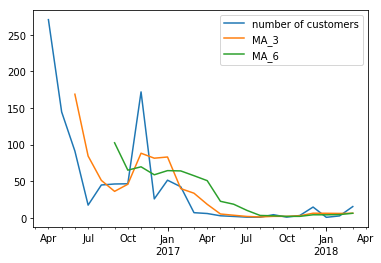

In [47]:
df_customers['number of customers'].plot()
df_customers['MA_3'].plot()
df_customers['MA_6'].plot()

plt.legend()
plt.show()

Consider the first couple of rows of the dataframe `df_customers`.

----------

**Exercise**

Why does "NaN" mean and why do they appear? Hint: use google if you do not know what "NaN" stands for.

-----------

In [48]:
df_customers.head(10)

,log number of customers,number of customers,MA_3,MA_6
2016-04-30,5.601455,270.820110,NaN,NaN
2016-05-31,4.973798,144.574883,NaN,NaN
2016-06-30,4.511630,91.070181,168.821724,NaN
2016-07-31,2.840784,17.129193,84.258085,NaN
2016-08-31,3.799295,44.669687,50.956353,NaN
2016-09-30,3.829193,46.025374,35.941418,102.381571
2016-10-31,3.835484,46.315862,45.670308,64.964197
2016-11-30,5.147401,171.983930,88.108389,69.532371
2016-12-31,3.243655,25.627224,81.309005,58.625212
2017-01-31,3.936429,51.235289,82.948815,64.309561


--------------

**Exercise**

Add a column to `df_customers` with the price per period.

------------

In [49]:
print(len(df_customers['number of customers']))
print(len(vector_p))

24
25


In [52]:
df_customers['price']= vector_p[1:]

Assume that your costs per sale equal 0.1.

-----------

**Exercise**

Add a column `profits` to the dataframe.

-----------


In [53]:
df_customers['profits'] = (df_customers['price']-0.1)*df_customers['number of customers']

In [54]:
df_customers['profits'].head()

2016-04-30    27.082011
2016-05-31    14.457488
2016-06-30     9.107018
2016-07-31     1.712919
2016-08-31     4.466969
Freq: M, Name: profits, dtype: float64

------------

**Exercise**

Plot the number of customers against profit. Explain the shape of curve that you see.

------------

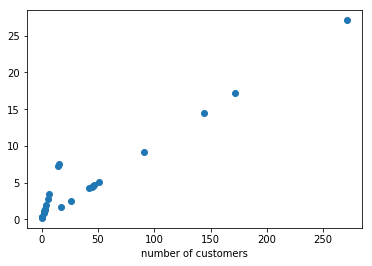

In [55]:
plt.scatter(df_customers['number of customers'], df_customers['profits'])
plt.xlabel('number of customers')
plt.show()